In [18]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
# %matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
from numpy import sqrt
%matplotlib inline
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [19]:
data2018 = load_dataset('/Users/carlo/OneDrive/Escritorio/UNI/TERCERO/AP/kaggle/2018_Financial_Data.csv')
data_values = data2018.values
data2018.dataframeName = '2018_Financial_Data.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2018.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (4392, 225)
Dimensionalitat de les entrades X (4392, 2)
Dimensionalitat de l'atribut Y (4392,)


In [20]:
data2018.head(10)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,94507000000.000,0.112,0.000,94507000000.000,0.000,64822000000.000,75498000000.000,19009000000.000,3542000000.000,...,0.257,0.000,0.343,0.072,0.731,0.000,0.131,Consumer Cyclical,32.795,1
1,KMI,14144000000.000,0.032,7288000000.000,6856000000.000,0.000,601000000.000,3062000000.000,3794000000.000,1917000000.000,...,0.035,-0.092,-0.002,0.008,-0.014,0.000,-0.127,Energy,40.588,1
2,INTC,70848000000.000,0.129,27111000000.000,43737000000.000,13543000000.000,6750000000.000,20421000000.000,23316000000.000,-126000000.000,...,0.199,0.039,0.038,0.101,-0.017,0.039,-0.094,Technology,30.296,1
3,MU,30391000000.000,0.495,12500000000.000,17891000000.000,2141000000.000,813000000.000,2897000000.000,14994000000.000,342000000.000,...,0.457,0.151,0.228,0.639,-0.584,0.174,0.094,Technology,64.214,1
4,GE,121615000000.000,0.029,95461000000.000,26154000000.000,0.000,18111000000.000,40711000000.000,-14557000000.000,5059000000.000,...,-0.278,-0.289,-0.158,-0.449,-0.230,0.000,0.031,Industrials,44.758,1
5,BAC,91247000000.000,0.045,0.000,91247000000.000,0.000,53381000000.000,53381000000.000,37866000000.000,0.000,...,0.068,0.000,0.032,0.003,-0.001,0.000,-0.025,Financial Services,44.316,1
6,AAPL,265595000000.000,0.159,163756000000.000,101839000000.000,14236000000.000,16705000000.000,30941000000.000,70898000000.000,0.000,...,0.373,-0.185,-0.026,-0.158,-0.010,0.229,0.095,Technology,88.742,1
7,MSFT,110360000000.000,0.143,38353000000.000,72007000000.000,14726000000.000,22223000000.000,36949000000.000,35058000000.000,0.000,...,0.181,0.221,0.034,-0.051,-0.107,0.130,0.114,Technology,58.259,1
8,SIRI,5770692000.000,0.064,2308606000.000,3462086000.000,123219000.000,1311199000.000,1735138000.000,1726948000.000,350073000.000,...,-0.036,0.089,-0.019,-0.237,0.021,0.096,0.031,Consumer Cyclical,22.162,1
9,HPQ,58472000000.000,0.123,47803000000.000,10669000000.000,1404000000.000,4859000000.000,6605000000.000,4064000000.000,1051000000.000,...,0.158,0.048,0.052,0.804,-0.234,0.180,0.110,Technology,3.017,1


In [21]:
corr = data2018.corr()
corr

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
Revenue,1.000,-0.004,0.954,0.815,0.365,0.702,0.800,0.640,0.467,0.652,...,0.045,-0.004,-0.005,-0.009,-0.003,-0.006,-0.025,-0.020,0.005,0.075
Revenue Growth,-0.004,1.000,-0.003,-0.005,-0.002,-0.004,-0.004,-0.005,-0.005,-0.006,...,-0.000,-0.000,-0.000,0.001,0.000,-0.000,0.026,0.002,-0.004,0.009
Cost of Revenue,0.954,-0.003,1.000,0.603,0.255,0.525,0.606,0.447,0.389,0.466,...,0.031,-0.011,-0.004,-0.007,-0.004,-0.005,-0.023,-0.015,0.003,0.065
Gross Profit,0.815,-0.005,0.603,1.000,0.477,0.850,0.955,0.836,0.491,0.836,...,0.060,-0.004,-0.006,-0.010,0.000,-0.005,-0.022,-0.024,0.008,0.080
R&D Expenses,0.365,-0.002,0.255,0.477,1.000,0.284,0.429,0.444,0.110,0.526,...,0.023,-0.004,-0.002,-0.004,0.009,-0.003,0.010,-0.002,0.014,0.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Debt Growth,-0.006,-0.000,-0.005,-0.005,-0.003,-0.006,-0.006,-0.002,-0.001,-0.002,...,-0.001,-0.002,-0.001,-0.000,0.088,1.000,-0.001,0.218,0.005,0.014
R&D Expense Growth,-0.025,0.026,-0.023,-0.022,0.010,-0.021,-0.021,-0.018,-0.025,-0.017,...,-0.000,0.002,0.001,0.002,0.005,-0.001,1.000,0.077,0.007,-0.020
SG&A Expenses Growth,-0.020,0.002,-0.015,-0.024,-0.002,-0.014,-0.018,-0.030,-0.020,-0.025,...,0.021,0.018,0.025,0.234,0.121,0.218,0.077,1.000,-0.007,-0.037
2019 PRICE VAR [%],0.005,-0.004,0.003,0.008,0.014,0.011,0.002,0.016,0.002,0.018,...,0.007,-0.001,-0.007,-0.006,-0.006,0.005,0.007,-0.007,1.000,0.423


## Limpiamos datos

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


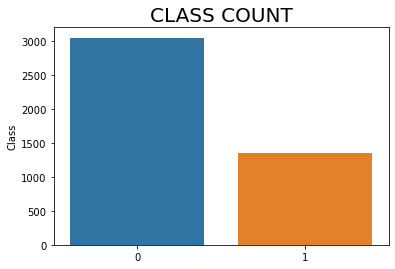

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


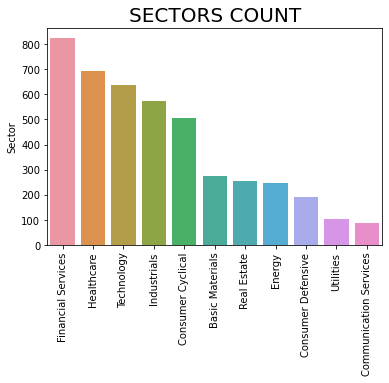

In [22]:
import seaborn as sns## Limpiamos datos
# Plot class distribution
df2018_class = data2018['Class'].value_counts()
sns.barplot(np.arange(len(df2018_class)), df2018_class)
plt.title('CLASS COUNT', fontsize=20)
plt.show()

# Plot sector distribution
df2018_sector = data2018['Sector'].value_counts()
sns.barplot(np.arange(len(df2018_sector)), df2018_sector)
plt.xticks(np.arange(len(df2018_sector)), df2018_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

In [23]:
df2018_class

1    3046
0    1346
Name: Class, dtype: int64

The plots above show that:

1. the samples are not balanced in terms of class. Indeed, 1346 samples belong to class 0, which as explained in the documentation of the dataset correspond to stocks that are not buy-worthy. At the same time, 3046 samples belong to class 1, meaning they are buy-worthy stocks. This should be accounted for when splitting the data between training and testing data (it is useful to use the stratify option available within sklearn.model_selection.train_test_split).
2. there is a total of 11 sectors, 4 of them with about 500+ stocks each, while the remaining 6 sectors have less than 300 stocks. In particular, the sectors Utilities and Communication Services have around 100 samples. This has to be kept in mind if we want to use this data with ML algorithms: there are very few samples, which could lead to overfitting, etc.

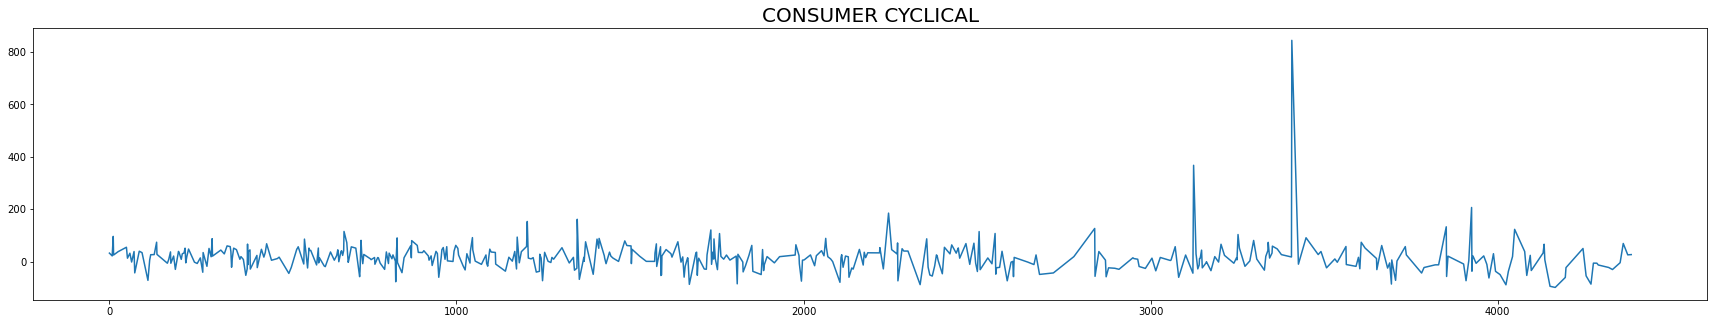

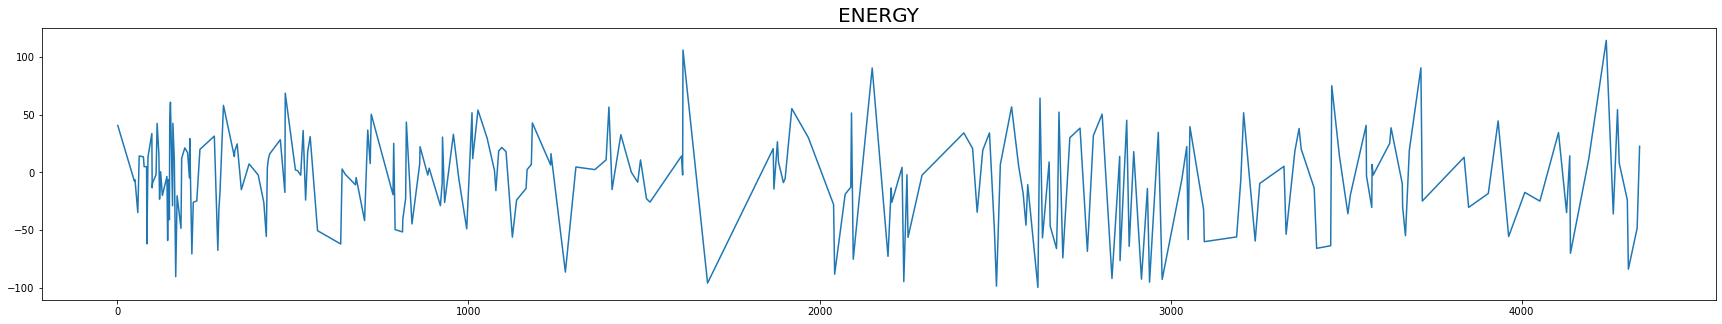

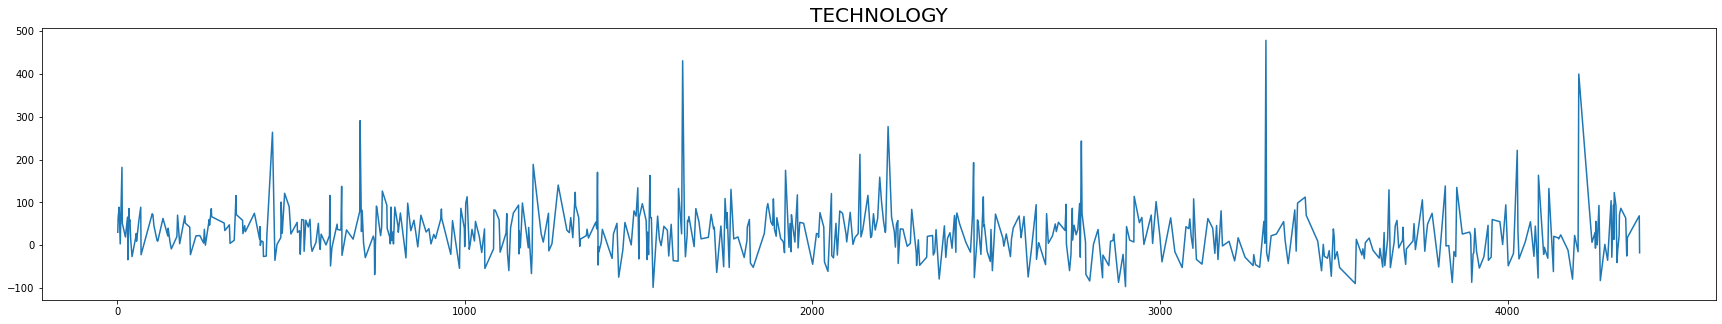

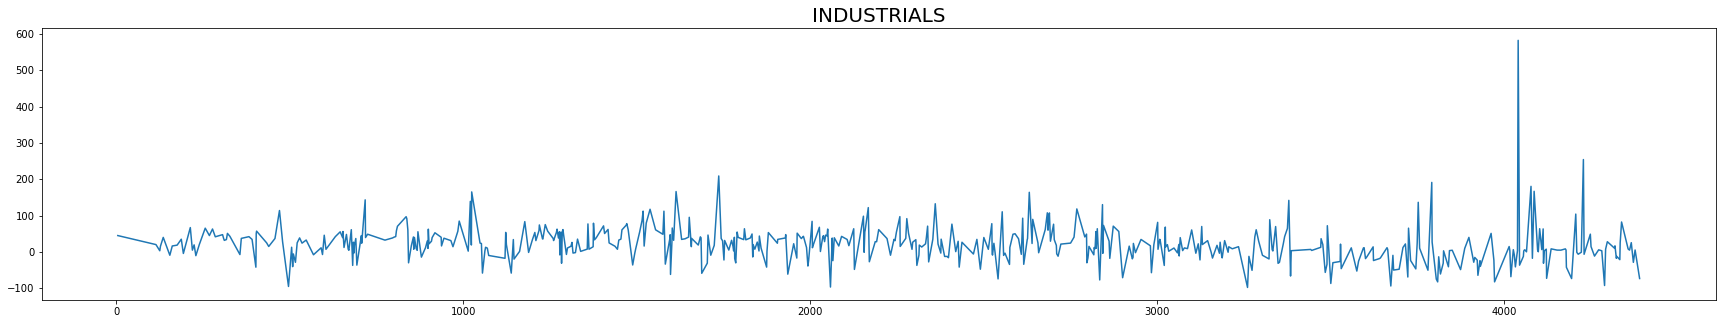

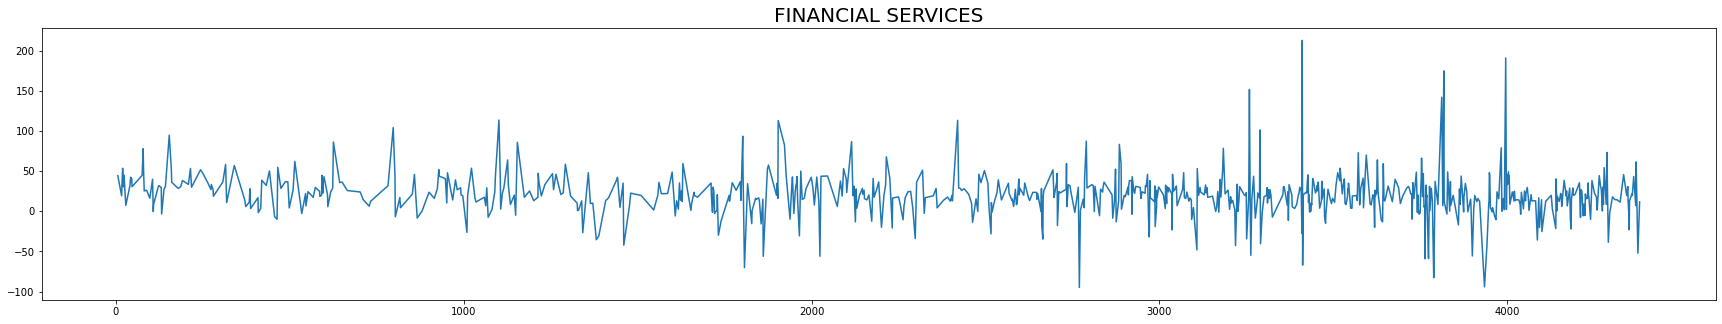

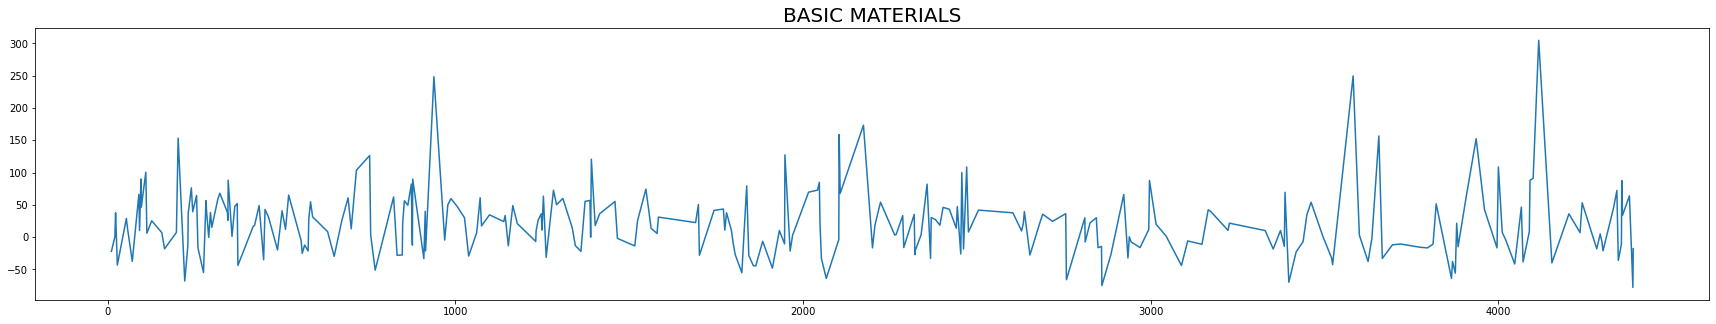

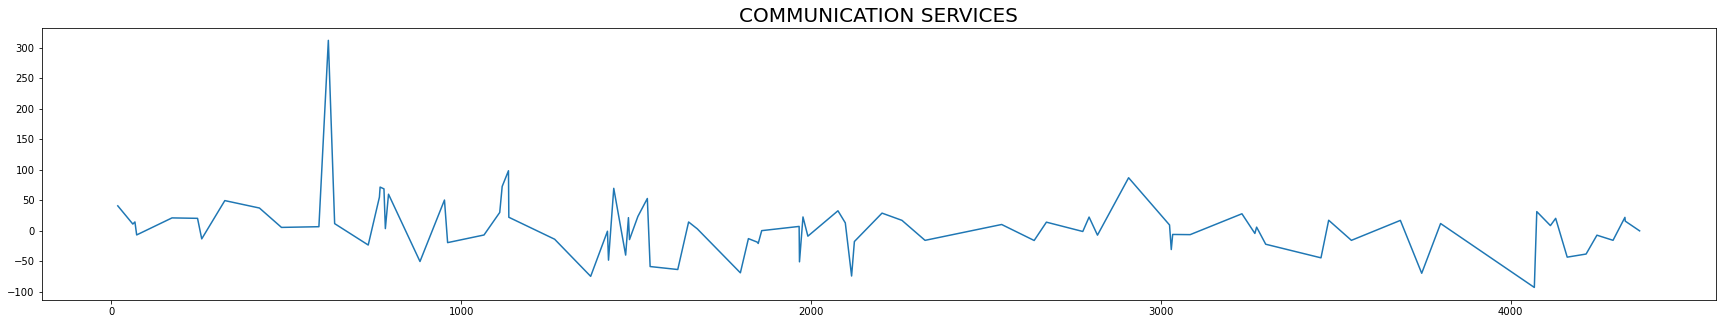

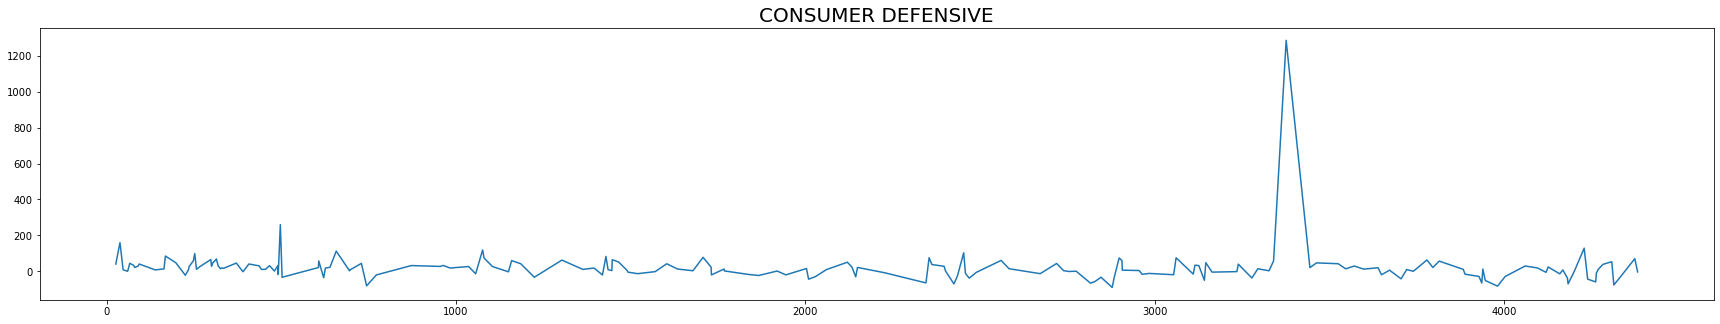

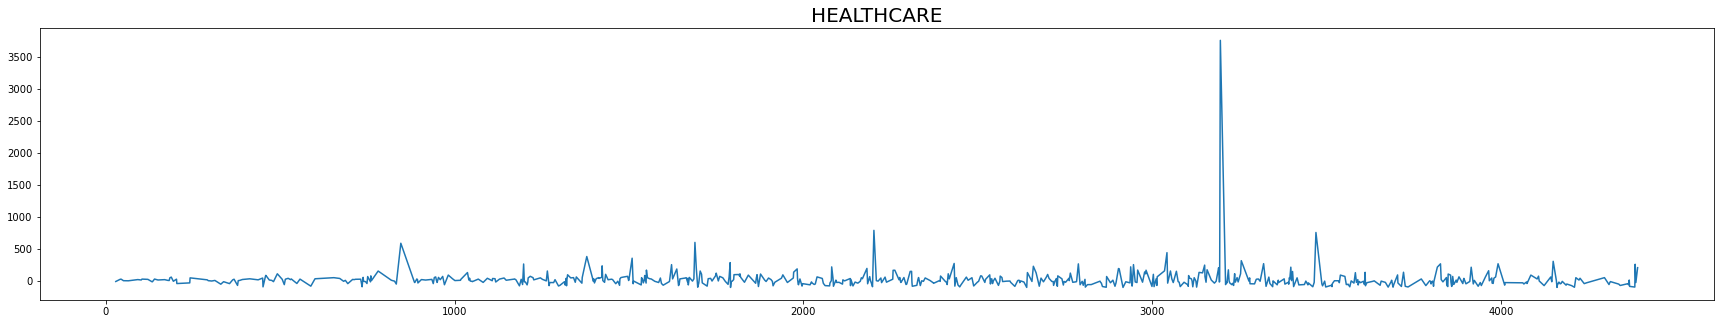

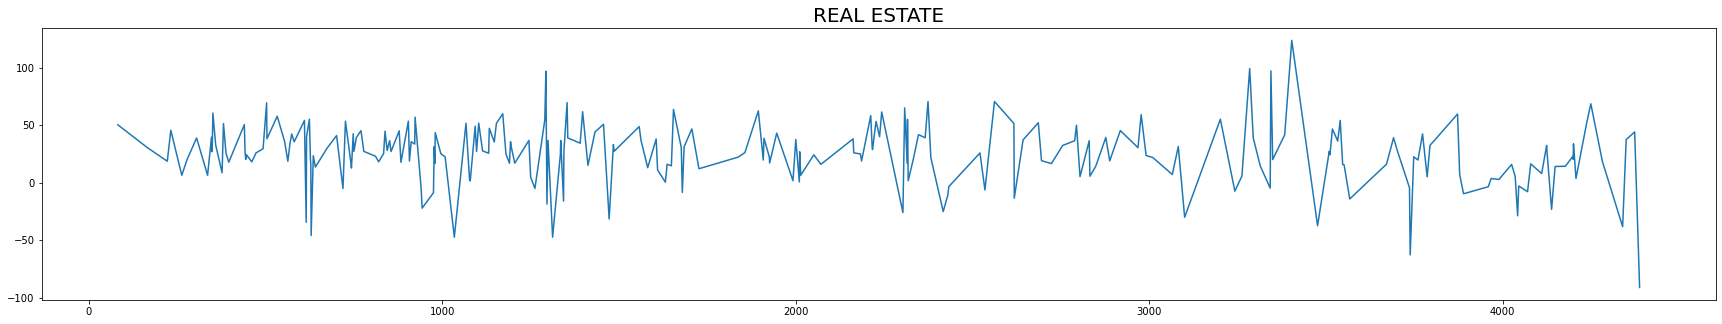

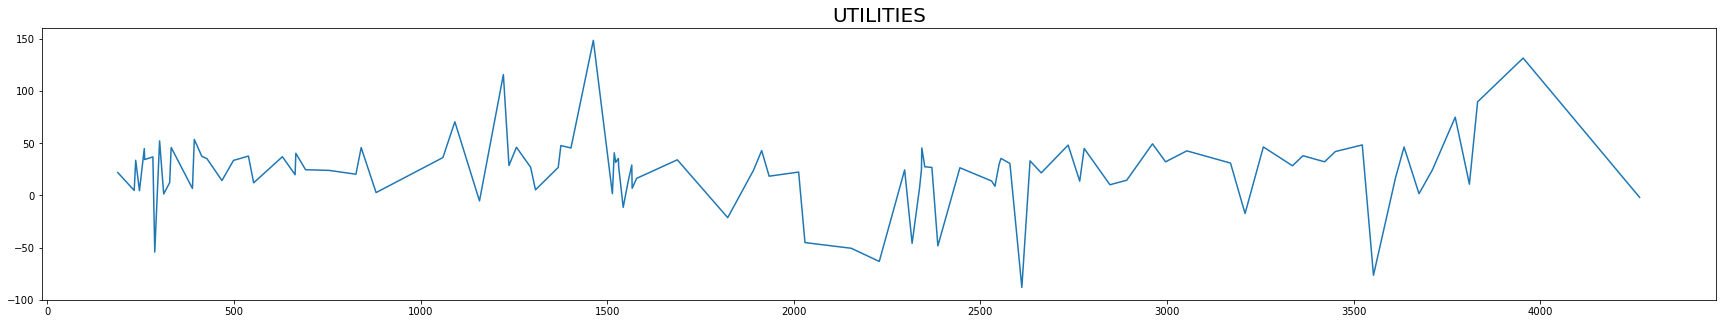

In [24]:
# Extract the columns we need in this step from the dataframe
df2018_ = data2018.loc[:, ['Sector', '2019 PRICE VAR [%]']]

# Get list of sectors
sector_list = df2018_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = df2018_[df2018_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2019 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

Thanks to this check, we can clearly see that there are indeed some major peaks in the following sectors:

Consumer Defensive Basic Materials Healthcare Consumer Cyclical Industrials Real Estate Energy Financial Services Utilities Technology This means that, for one reason or another, some stocks experienced incredible gains. However, how can be sure that each of these gains is organic (i.e. due to trading activity)?

We can take a closer look at this situation by plotting the price trend for those stocks that increased their value by more than 500% during 2018. While it is possible for a stock to experience such gains, I'd still like to verify it with my eyes.

Here, we will use pandas_datareader to pull the Adjusted Close daily price, during 2019, of the required stocks. To further investigate these stocks, I think it is worth to plot the Volume too.

In [25]:
# Get stocks that increased more than 500%
from pandas_datareader import data

gain = 500
top_gainers = df2018_[df2018_['2019 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2019 PRICE VAR [%]'].sort_values(ascending=False) 
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

8 STOCKS with more than 500% gain.



In [26]:
indices = list(df2018_[df2018_['2019 PRICE VAR [%]'] >= 500].index)
excess_ret_tickers = list(data2018.loc[indices, :].iloc[:, 0])
excess_ret_tickers

['ARQL', 'DRRX', 'ALIM', 'AXSM', 'ANFI', 'SSI', 'DRIO', 'HEBT']

In [27]:
tickers = top_gainers.index.values.tolist()
data2018.drop(tickers, axis=0, inplace=True)

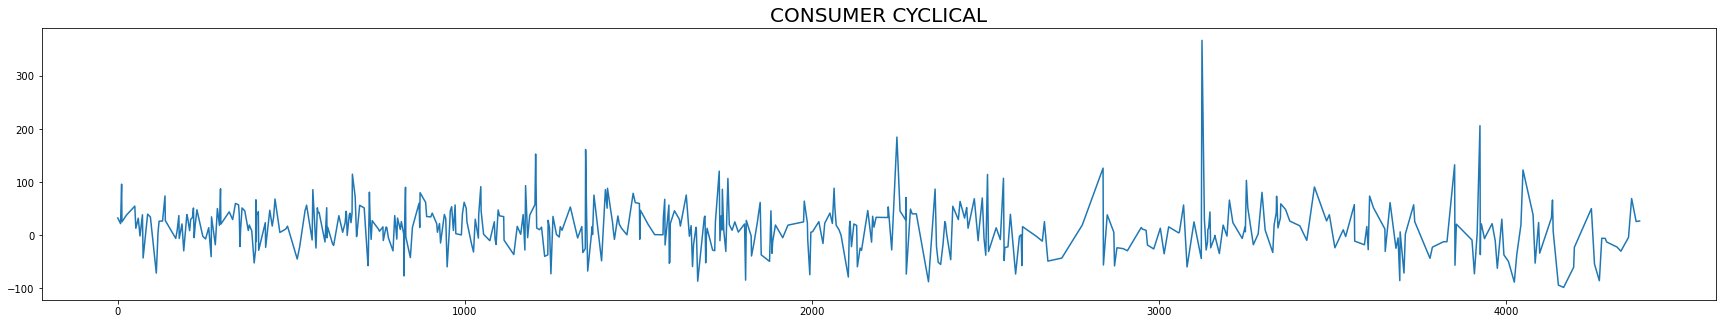

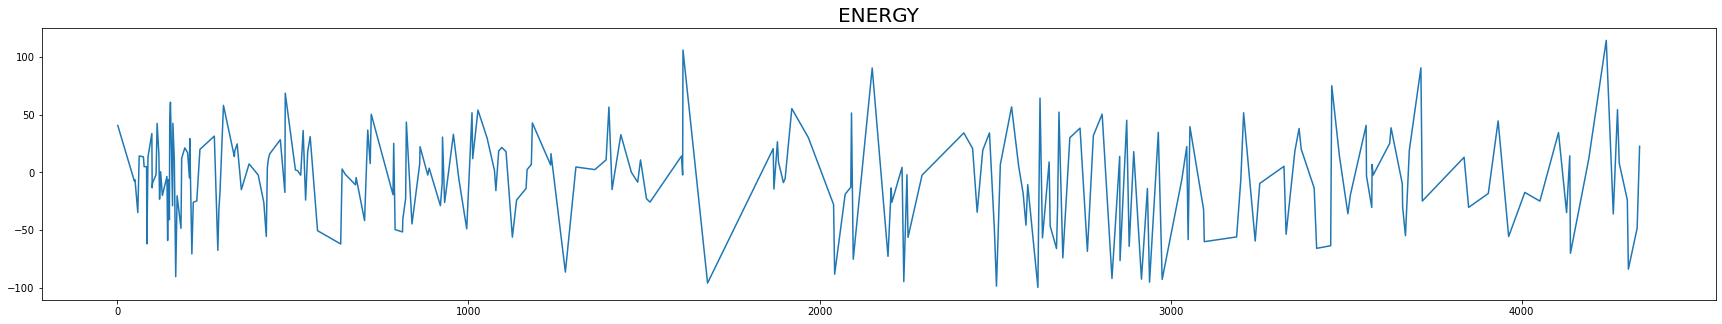

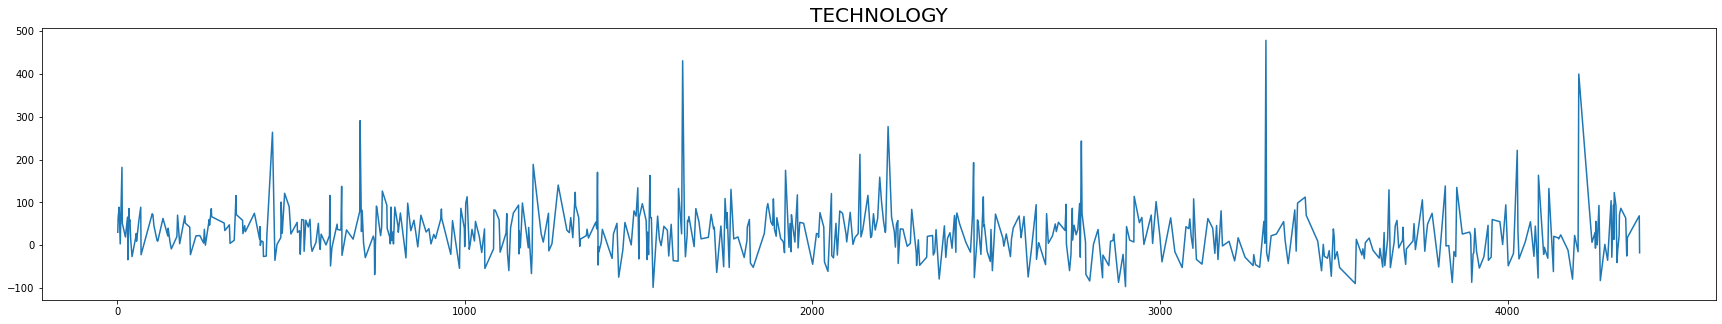

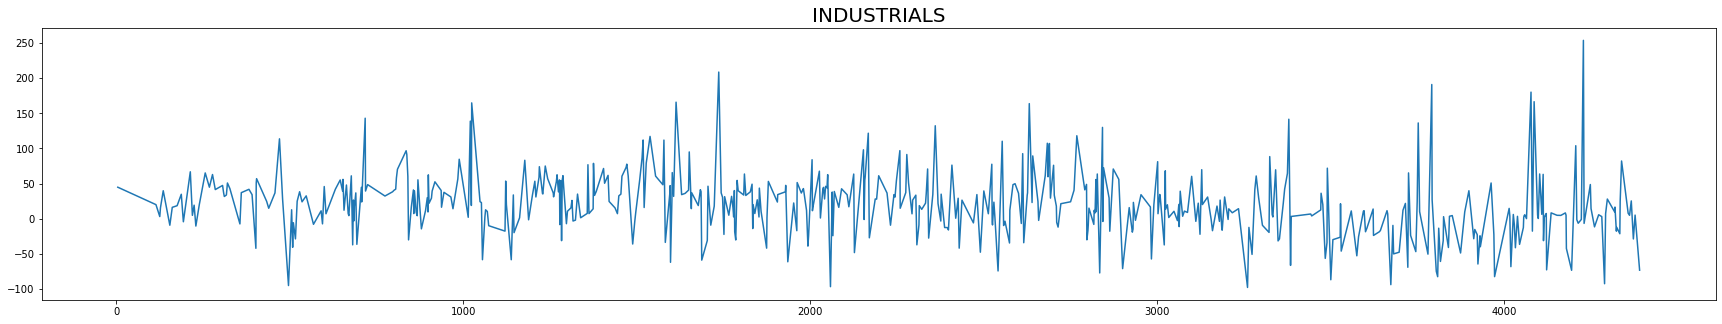

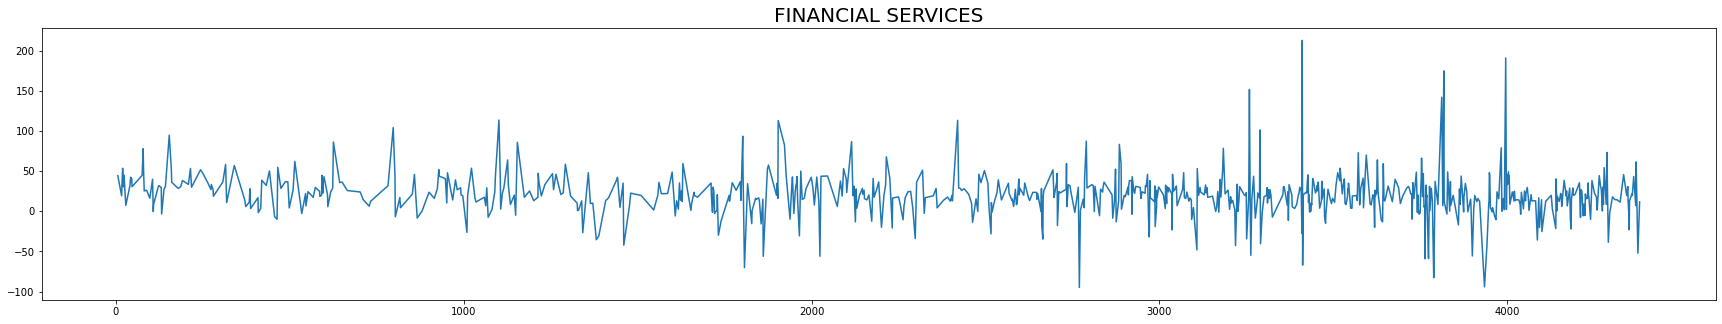

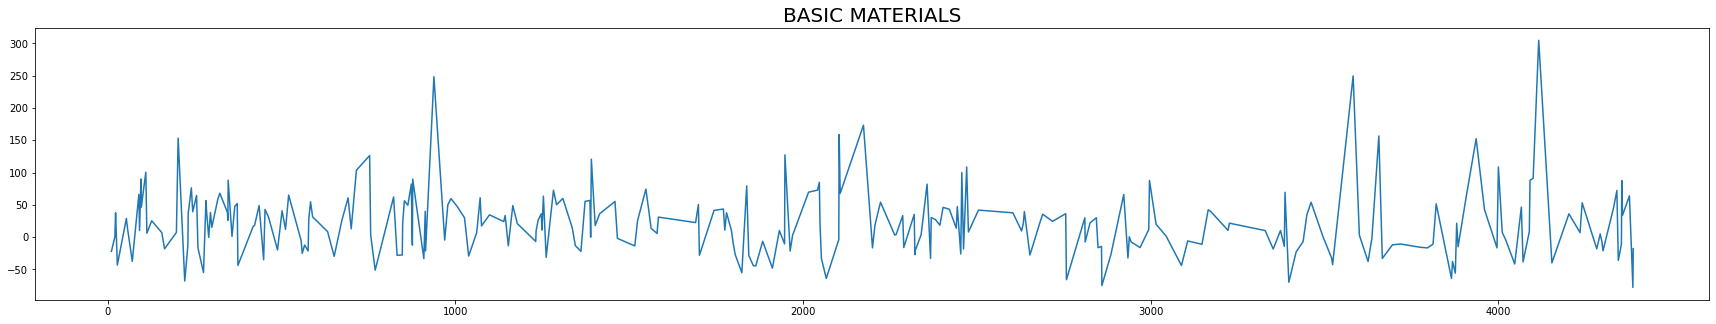

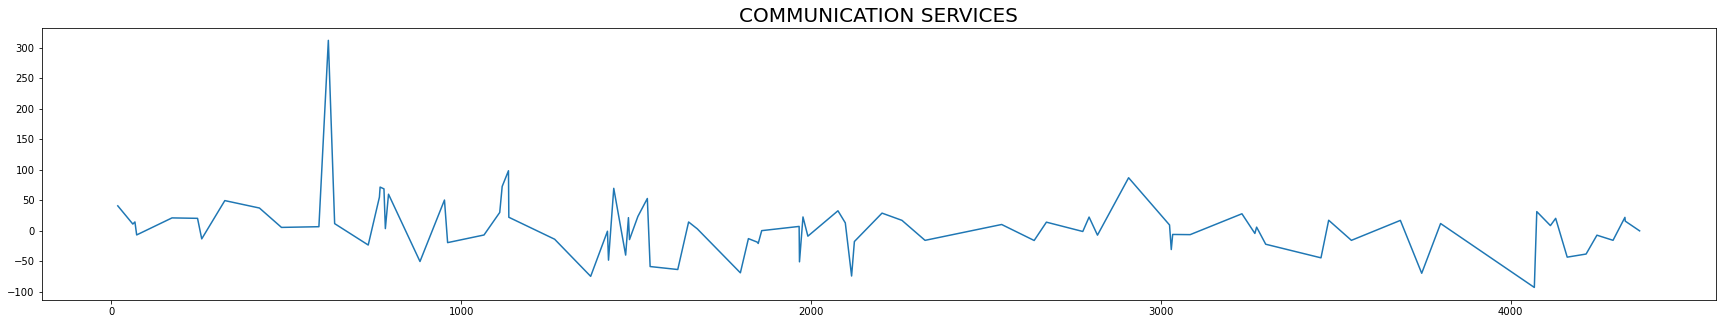

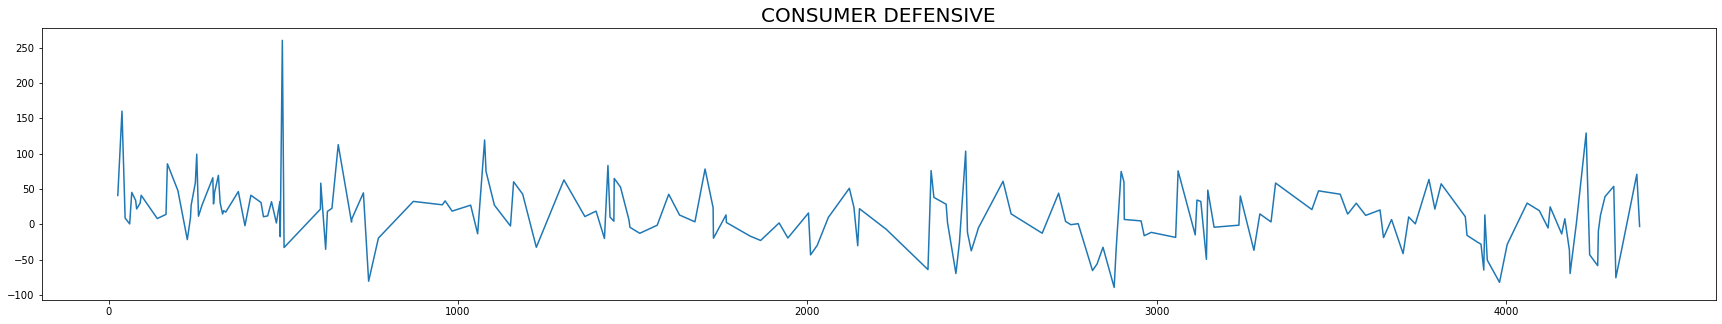

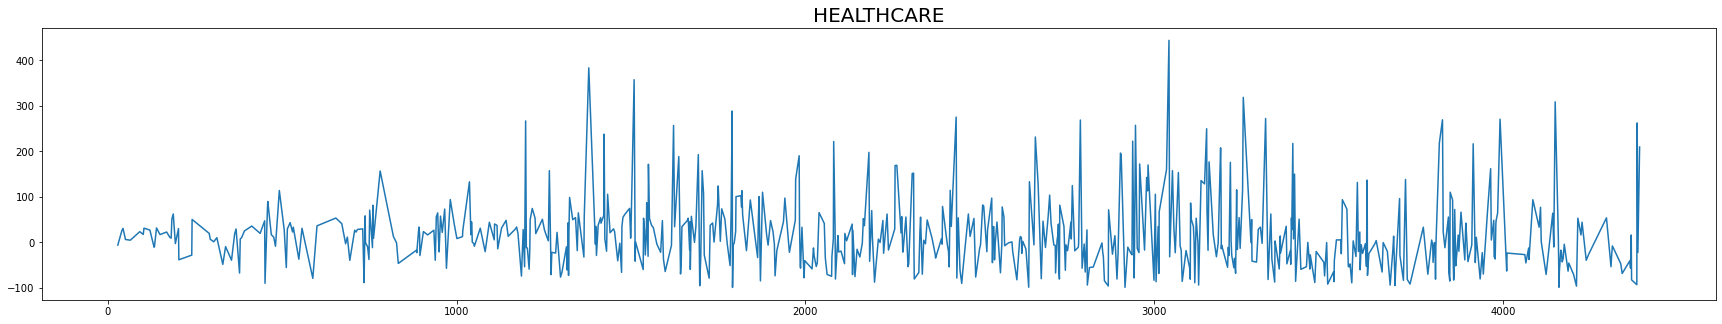

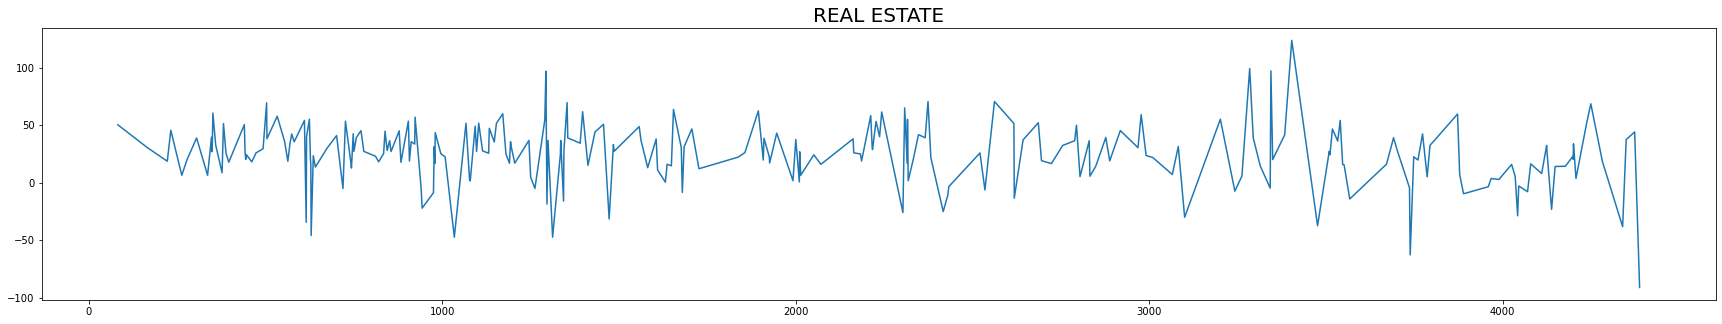

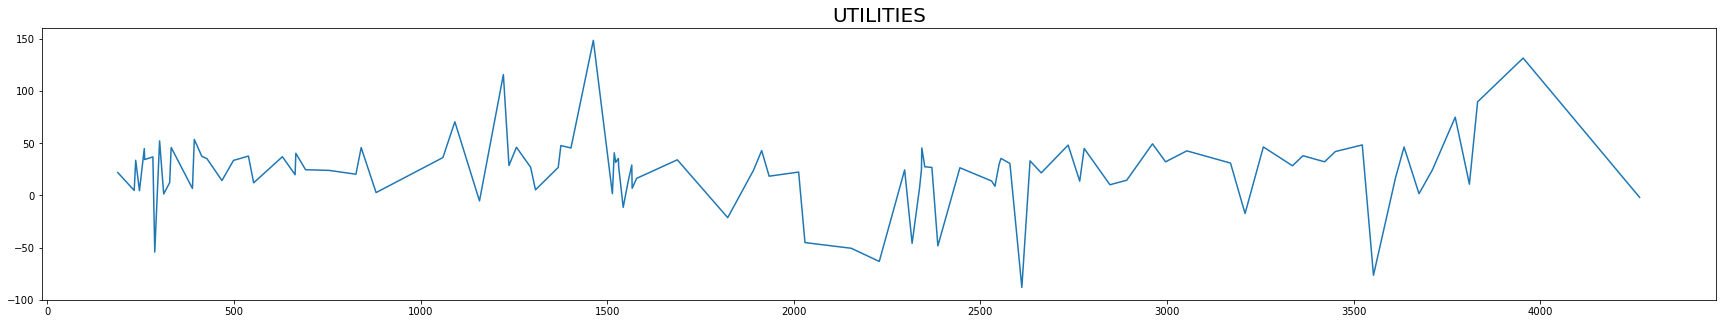

In [28]:
df2018_ = data2018.loc[:, ['Sector', '2019 PRICE VAR [%]']]
sector_list = df2018_['Sector'].unique()

for sector in sector_list:
    
    temp = df2018_[df2018_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2019 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

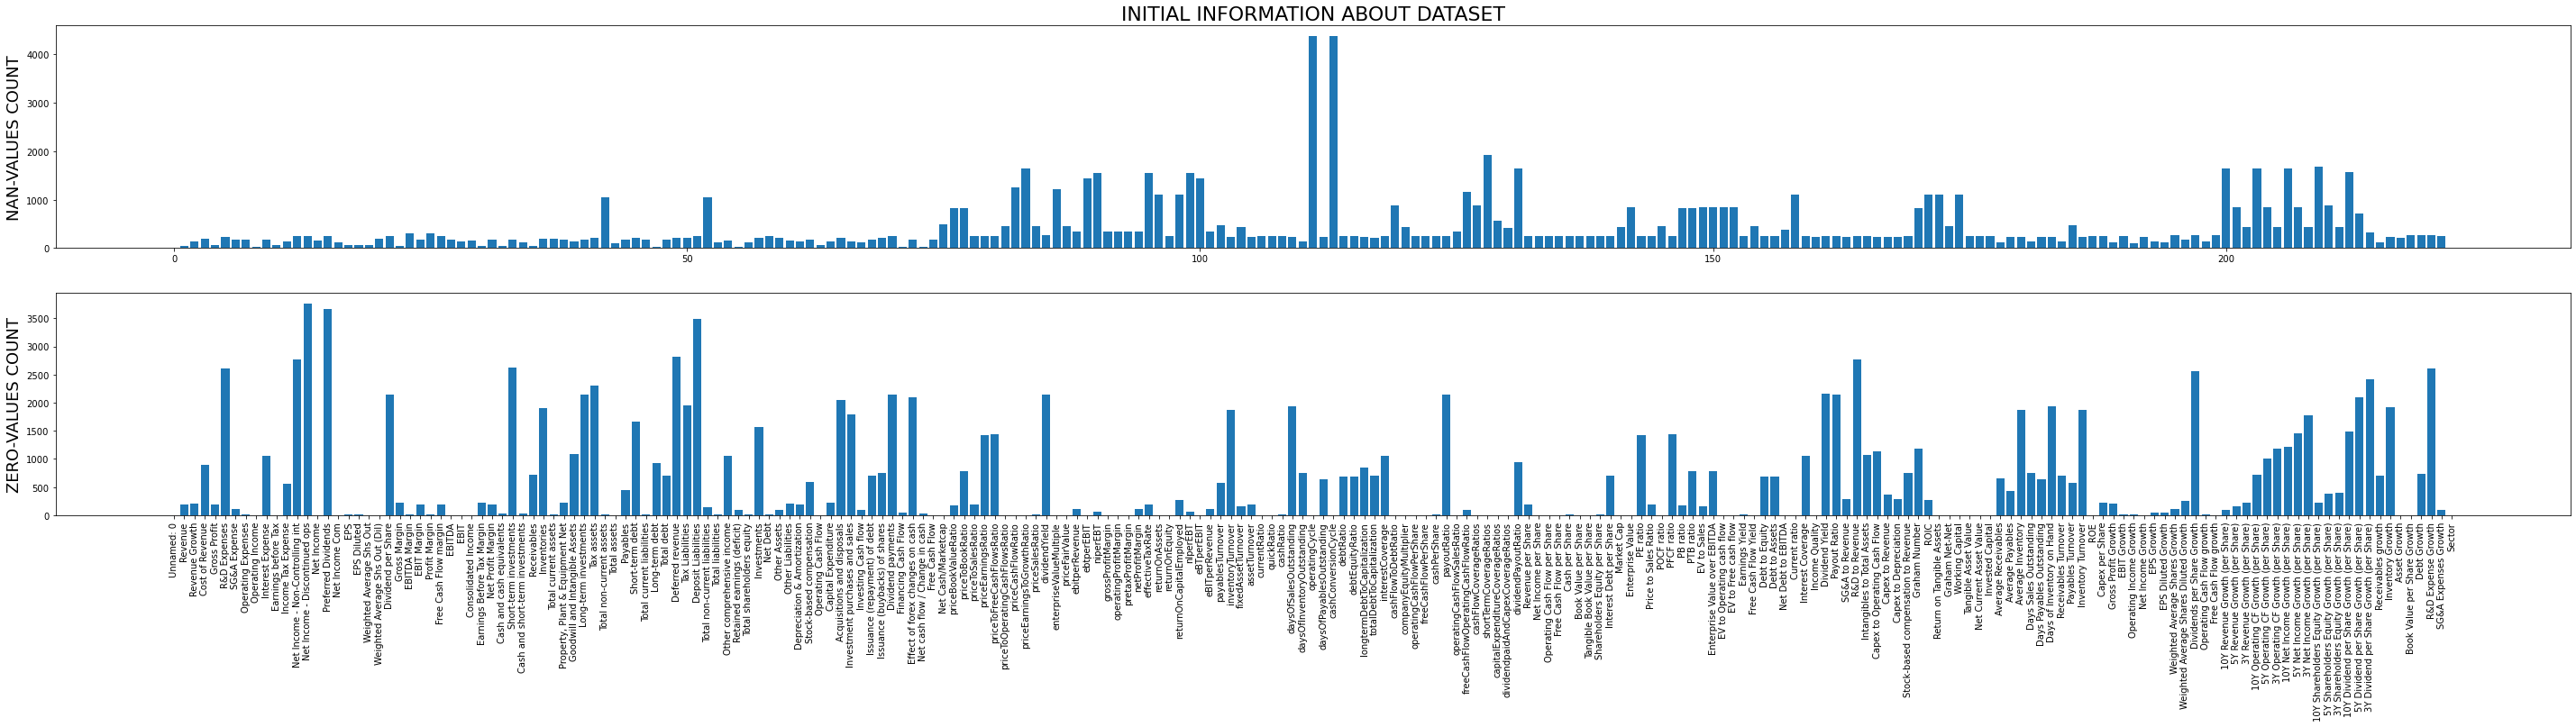

In [29]:
class_data = data2018.loc[:, ['Class', '2019 PRICE VAR [%]']]
data2018.drop(['Class', '2019 PRICE VAR [%]'], inplace=True, axis=1)

# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = data2018.isna().sum()
zero_vals = data2018.isin([0]).sum()
ind = np.arange(data2018.shape[1])

plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')

plt.show()

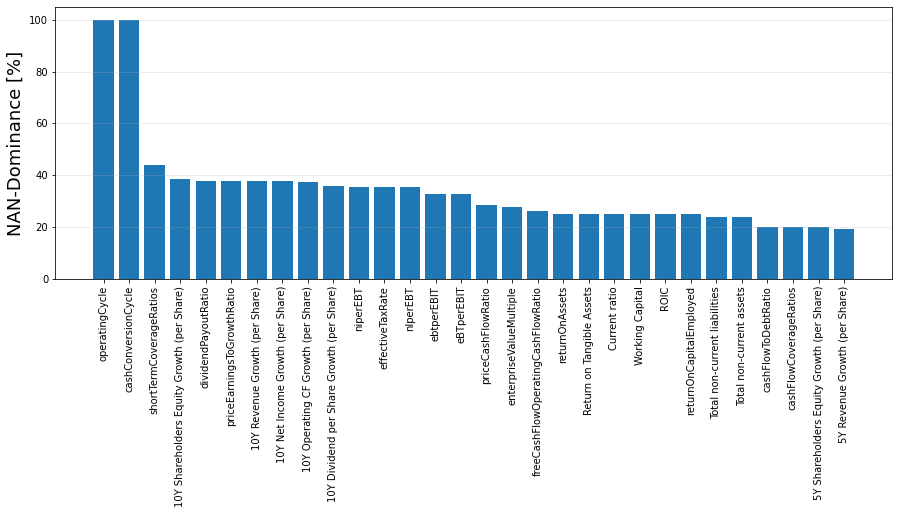

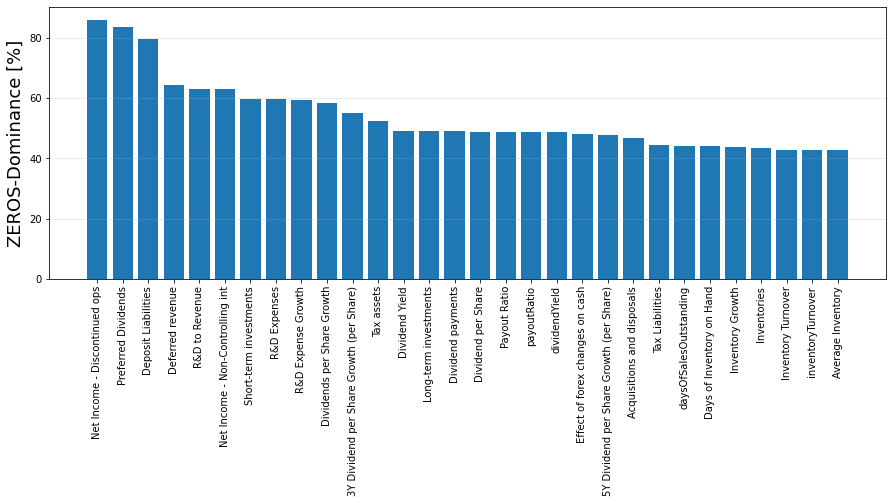

In [30]:
# Find count and percent of nan-values, zero-values
total_nans = data2018.isnull().sum().sort_values(ascending=False)
percent_nans = (data2018.isnull().sum()/data2018.isnull().count() * 100).sort_values(ascending=False)
total_zeros = data2018.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (data2018.isin([0]).sum()/data2018.isin([0]).count() * 100).sort_values(ascending=False)
data2018_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
data2018_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), data2018_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), data2018_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), data2018_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), data2018_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [31]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(data2018_nans.quantile(test_nan_level))
_, thresh_nan = data2018_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(data2018_zeros.quantile(test_zeros_level))
_, thresh_zeros = data2018_zeros.quantile(test_zeros_level)

Total NaN     251.000
Percent NaN     5.725
Name: 0.5, dtype: float64
Total Zeros     273.600
Percent Zeros     6.241
Name: 0.6, dtype: float64


In [11]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {data2018.shape[1]}')
print()

data2018_test1 = data2018.drop((data2018_nans[data2018_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {data2018_test1.shape[1]}')
print()

data2018_zeros_postnan = data2018_zeros.drop((data2018_nans[data2018_nans['Percent NaN'] > thresh_nan]).index, axis=0)
data2018_test2 = data2018_test1.drop((data2018_zeros_postnan[data2018_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {data2018_test2.shape[1]}')

INITIAL NUMBER OF VARIABLES: 223

NUMBER OF VARIABLES AFTER NaN THRESHOLD 5.71%: 123

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 6.29%: 63


C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


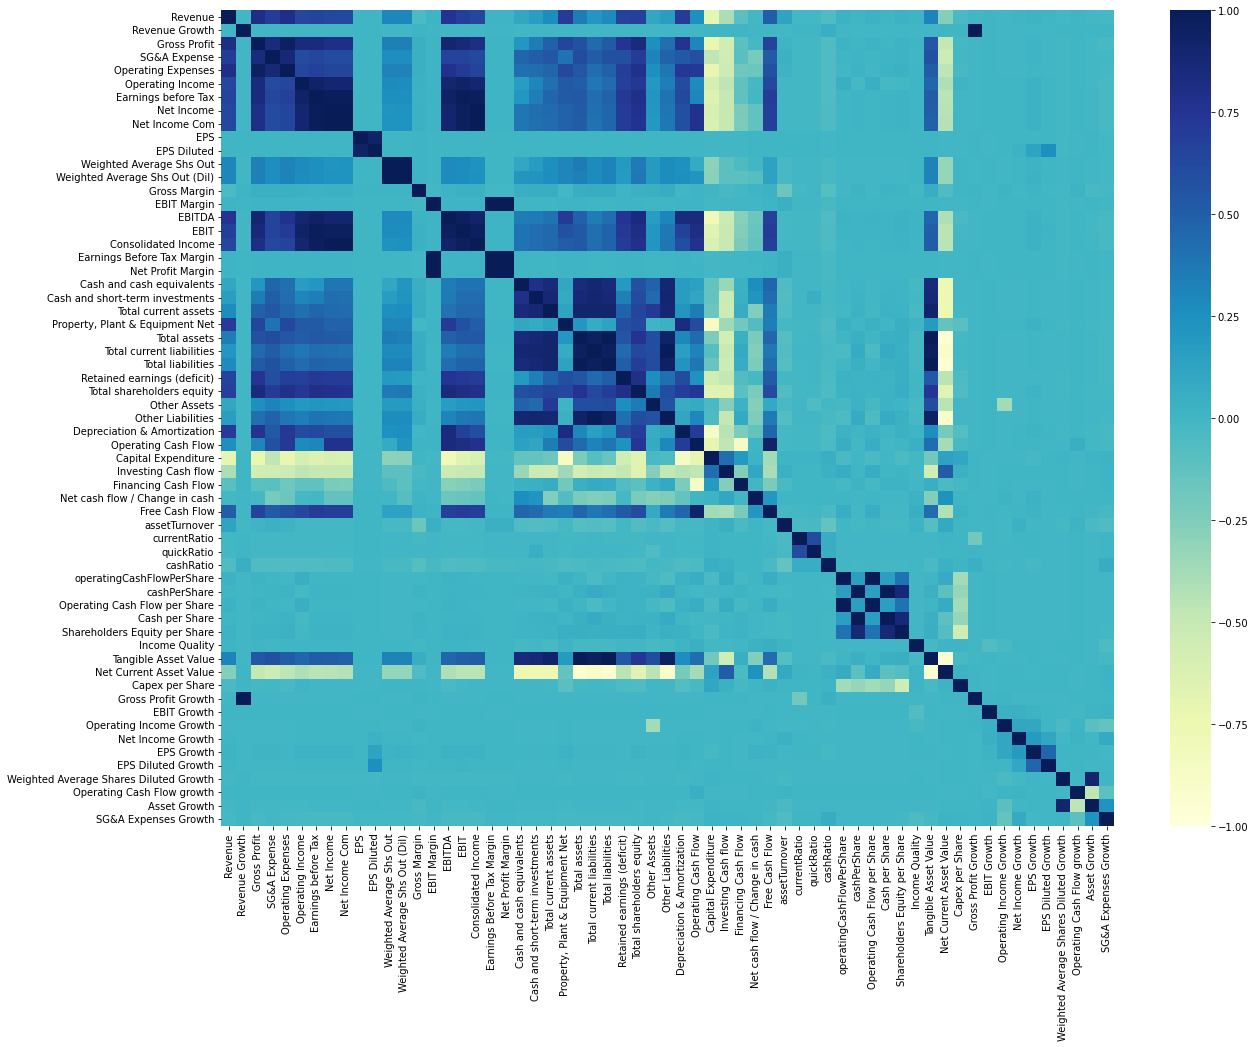

In [19]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(data2018_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

## HANDLE EXTREME VALUES

In [12]:
data2018_test2.describe()

,Revenue,Revenue Growth,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,...,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Asset Growth,SG&A Expenses Growth
count,4346.000,4253.000,4328.000,4226.000,4208.000,4357.000,4321.000,4241.000,4275.000,4327.000,...,4267.000,4144.000,4283.000,4162.000,4261.000,4267.000,4210.000,4250.000,4178.000,4144.000
mean,5119287287.411,3.455,2043953744.675,900502199.638,1435546261.603,654120692.075,558443193.092,447324846.929,448377645.794,-69.937,...,2.085,-1.687,0.544,1.424,0.551,9299.665,0.460,-5.268,1.389,0.154
std,20495043062.607,195.505,7682369039.529,3661115781.170,5529830929.879,2969340893.474,2639326733.464,2118659200.666,2103791026.064,5718.694,...,212.798,198.199,20.219,62.949,13.158,607446.155,10.585,283.023,35.124,0.840
min,-68941000.000,-3.462,-1818220000.000,-140159420.290,-4280000000.000,-14557000000.000,-21772000000.000,-22355000000.000,-22802000000.000,-359825.000,...,-5536.483,-12369.000,-224.200,-2036.750,-332.000,-332.000,-0.932,-18001.000,-0.999,-1.000
25%,65014250.000,0.000,36189031.609,20562264.500,42236441.500,-5510000.000,-10008000.000,-10651515.151,-11080500.000,-0.390,...,-0.012,-0.243,-0.246,-0.380,-0.325,-0.322,-0.003,-0.228,-0.037,-0.005
50%,498264000.000,0.075,221947000.000,93904500.000,180625280.000,42038000.000,27307000.000,23653000.000,23351000.000,0.690,...,0.071,0.086,0.075,0.148,0.186,0.186,0.009,0.082,0.035,0.066
75%,2457877750.000,0.189,976701500.000,411716250.000,679604000.000,286269000.000,223881000.000,196210000.000,197118000.000,2.310,...,0.213,0.445,0.382,0.684,0.693,0.691,0.091,0.433,0.161,0.168
max,500343000000.000,12739.000,126947000000.000,106510000000.000,106510000000.000,70898000000.000,72903000000.000,59531000000.000,59531000000.000,101641.000,...,12739.000,2367.423,886.989,3159.000,395.792,39679767.042,627.713,239.385,1184.994,43.719


In [32]:
# Cut outliers
top_quantiles = data2018_test2.quantile(0.97)
outliers_top = (data2018_test2 > top_quantiles)

low_quantiles = data2018_test2.quantile(0.03)
outliers_low = (data2018_test2 < low_quantiles)

data2018_test2 = data2018_test2.mask(outliers_top, top_quantiles, axis=1)
data2018_test2 = data2018_test2.mask(outliers_low, low_quantiles, axis=1)

# Take a look at the dataframe post-outliers cut
data2018_test2.describe()

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
count,4338.000,4245.000,4199.000,4320.000,4147.000,4218.000,4200.000,4349.000,4200.000,4313.000,...,2806.000,3677.000,4059.000,4260.000,4152.000,4170.000,4113.000,4120.000,4125.000,4136.000
mean,3443673336.611,0.136,1868364687.716,1432494022.975,39654958.475,608915741.402,986382101.787,449377582.593,73616770.993,374305926.166,...,-0.034,-0.016,0.007,0.135,0.058,0.112,0.053,0.105,0.057,0.112
std,7350918076.063,0.303,4155431085.258,3268793625.350,111880003.109,1396056656.482,2226176255.659,1103765885.760,158413717.533,966073504.042,...,0.225,0.220,0.152,0.484,0.213,0.316,0.449,0.577,0.202,0.216
min,0.000,-0.407,0.000,0.000,0.000,884558.570,4191689.710,-180050564.444,0.000,-226332040.000,...,-1.000,-1.000,-0.609,-0.637,-0.355,-0.374,-0.870,-0.917,-0.315,-0.229
25%,65480324.000,0.000,3415500.000,36286850.000,0.000,20709500.000,42925000.000,-5254519.000,0.000,-9900000.000,...,0.000,0.000,0.000,-0.048,0.000,-0.036,-0.107,-0.083,0.000,-0.005
50%,499019500.000,0.075,175282000.000,223927000.000,0.000,94036000.000,181157500.000,42503000.000,5701000.000,27842000.000,...,0.000,0.000,0.000,0.010,0.000,0.035,0.026,0.000,0.000,0.066
75%,2466117250.000,0.189,1299562000.000,978957250.000,14485000.000,413115250.000,681217250.000,288000000.000,58511461.938,224255000.000,...,0.023,0.037,0.043,0.186,0.080,0.161,0.139,0.116,0.009,0.168
max,33696138457.712,1.250,18935225851.379,15980940000.000,560957620.000,6759555000.000,10926550000.000,5186600000.000,718887557.604,4502600000.000,...,0.190,0.291,0.338,1.996,0.814,1.238,1.624,2.412,0.811,0.812


## FILL MISSING VALUES

In [33]:
# Replace nan-values with mean value of column, considering each sector individually.
data2018_test2 = data2018_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  


In [34]:
# Add the sector column
data2018_out = data2018_test2.join(data2018['Sector'])

# Add back the classification columns
data2018_out = data2018_out.join(class_data)

# Print information about dataset
data2018_out.info()
data2018_out.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4384 entries, 0 to 4391
Columns: 224 entries, Revenue to 2019 PRICE VAR [%]
dtypes: float64(222), int64(1), object(1)
memory usage: 7.7+ MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,2019 PRICE VAR [%]
count,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,...,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000,4384.000
mean,3438535882.988,0.136,1830018467.906,1432572232.046,37937631.505,617520597.684,993625058.059,449917056.615,72791618.886,375069039.147,...,0.009,0.134,0.056,0.111,0.052,0.105,0.055,0.111,0.693,18.740
std,7313409891.221,0.299,4073519683.758,3246209695.236,109092842.838,1370448748.512,2180903417.961,1099540714.040,155371112.980,958449482.397,...,0.147,0.477,0.208,0.308,0.435,0.560,0.196,0.210,0.461,51.451
min,0.000,-0.407,0.000,0.000,0.000,884558.570,4191689.710,-180050564.444,0.000,-226332040.000,...,-0.609,-0.637,-0.355,-0.374,-0.870,-0.917,-0.315,-0.229,0.000,-99.865
25%,66051000.000,0.000,5770544.000,37767500.000,0.000,21963816.000,46445513.250,-5143750.000,0.000,-9444941.111,...,0.000,-0.042,0.000,-0.032,-0.094,-0.070,0.000,0.000,0.000,-7.515
50%,521681000.000,0.079,207829264.834,239704500.000,0.000,104759000.000,202569500.000,44031000.000,7580500.000,30155000.000,...,0.000,0.018,0.000,0.043,0.037,0.000,0.000,0.073,1.000,17.515
75%,2582760250.000,0.185,1230018750.000,1027530250.000,14483000.000,505181500.000,796542750.000,298885500.000,58664750.000,241226750.000,...,0.053,0.180,0.072,0.147,0.126,0.113,0.013,0.156,1.000,39.443
max,33696138457.712,1.250,18935225851.379,15980940000.000,560957620.000,6759555000.000,10926550000.000,5186600000.000,718887557.604,4502600000.000,...,0.338,1.996,0.814,1.238,1.624,2.412,0.811,0.812,1.000,478.821
